In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/pdk.xlsx") #данные с таблицы

In [3]:
df = pd.DataFrame(data)

**Значения ПДКс.с за 2001 по 2018 года:**

In [4]:
df['Год'] = df['Год'].astype(int)

**Ввод ПДК и КЗ для каждого вещества:**

In [5]:
K3 = {'Диоксид азота': 4.5, 'Оксид азота': 4.5, 'Оксид углерода': 3,'Диоксид серы': 4.5}
PDK = {'Диоксид азота': 0.04, 'Оксид азота': 0.06, 'Оксид углерода': 3,'Диоксид серы': 0.05}

In [6]:
df['Диоксид азота конц'] = df['Диоксид азота'] * PDK['Диоксид азота']
df['Оксид азота конц'] = df['Оксид азота'] * PDK['Оксид азота']
df['Оксид углерода конц'] = df['Оксид углерода'] * PDK['Оксид углерода']
df['Диоксид серы конц'] = df['Диоксид серы'] * PDK['Диоксид серы']

**Концентрация веществ:**

In [7]:
df.loc[:,["Год","Диоксид азота конц","Оксид азота конц","Оксид углерода конц","Диоксид серы конц"]]

,Год,Диоксид азота конц,Оксид азота конц,Оксид углерода конц,Диоксид серы конц
0,2001,0.028,0.030,0.9,0.010
1,2002,0.036,0.048,0.9,0.015
2,2003,0.044,0.042,0.9,0.015
3,2004,0.052,0.048,0.9,0.015
4,2005,0.048,0.042,0.9,0.015
5,2006,0.056,0.036,0.9,0.020
6,2007,0.052,0.042,0.6,0.020
7,2008,0.036,0.030,0.6,0.010
8,2009,0.036,0.030,0.6,0.010
9,2010,0.040,0.030,0.6,0.010


Уравнение расчета риска для каждого вещества на каждый год:
![image.png](attachment:image.png)

In [8]:
df["Risk Диоксид азота"] = 1 - np.exp(np.log(0.84)*df["Диоксид азота конц"]/PDK["Диоксид азота"]/K3["Диоксид азота"])
df["Risk Оксид азота"] = 1 - np.exp(np.log(0.84)*df["Оксид азота конц"]/PDK["Оксид азота"]/K3["Оксид азота"])
df["Risk Оксид углерода"] = 1 - np.exp(np.log(0.84)*df["Оксид углерода конц"]/PDK["Оксид углерода"]/K3["Оксид углерода"])
df["Risk Диоксид серы"] = 1 - np.exp(np.log(0.84)*df["Диоксид серы конц"]/PDK["Диоксид серы"]/K3["Диоксид серы"])

In [9]:
for i in range(0,len(df["Год"])):
    df.loc[i,"Risk_Summ"] = 1 - (1 - df.loc[i,"Risk Диоксид азота"])*(1 - df.loc[i,"Risk Оксид азота"])*(1 - df.loc[i,"Risk Оксид углерода"])*(1 - df.loc[i,"Risk Диоксид серы"])

In [11]:
df.loc[:,["Год","Risk Диоксид азота","Risk Оксид азота","Risk Оксид углерода","Risk Диоксид серы","Risk_Summ"]]

,Год,Risk Диоксид азота,Risk Оксид азота,Risk Оксид углерода,Risk Диоксид серы,Risk_Summ
0,2001,0.026757,0.019186,0.017284,0.007719,0.069170
1,2002,0.034270,0.030521,0.017284,0.011556,0.090560
2,2003,0.041724,0.026757,0.017284,0.011556,0.094076
3,2004,0.049121,0.030521,0.017284,0.011556,0.104545
4,2005,0.045430,0.026757,0.017284,0.011556,0.097580
5,2006,0.052798,0.022979,0.017284,0.015379,0.104545
6,2007,0.049121,0.026757,0.011556,0.015379,0.099326
7,2008,0.034270,0.019186,0.011556,0.007719,0.070972
8,2009,0.034270,0.019186,0.011556,0.007719,0.070972
9,2010,0.038004,0.019186,0.011556,0.007719,0.074564


**График риска для веществ с 2001 по 2018 года**

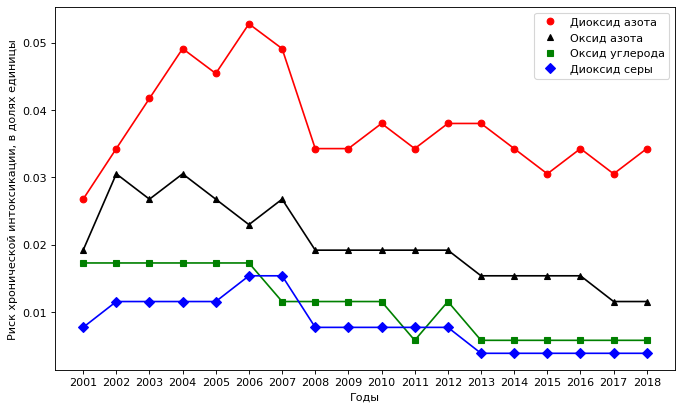

In [12]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
time = df['Год']
ax.plot(time,df["Risk Диоксид азота"],'r')
ax.plot(time,df["Risk Диоксид азота"],'ro', label = "Диоксид азота")
ax.plot(time,df["Risk Оксид азота"],'k')
ax.plot(time,df["Risk Оксид азота"],'k^', label = "Оксид азота")
ax.plot(time,df["Risk Оксид углерода"],'g')
ax.plot(time,df["Risk Оксид углерода"],'gs', label = "Оксид углерода")
ax.plot(time,df["Risk Диоксид серы"],'b')
ax.plot(time,df["Risk Диоксид серы"],'bD', label = "Диоксид серы")
ax.set_xticks(range(df['Год'].min(),df['Год'].max()+1))
ax.set_xlabel('Годы')
ax.set_ylabel('Риск хронической интоксикации, в долях единицы')
ax.legend()
plt.show()

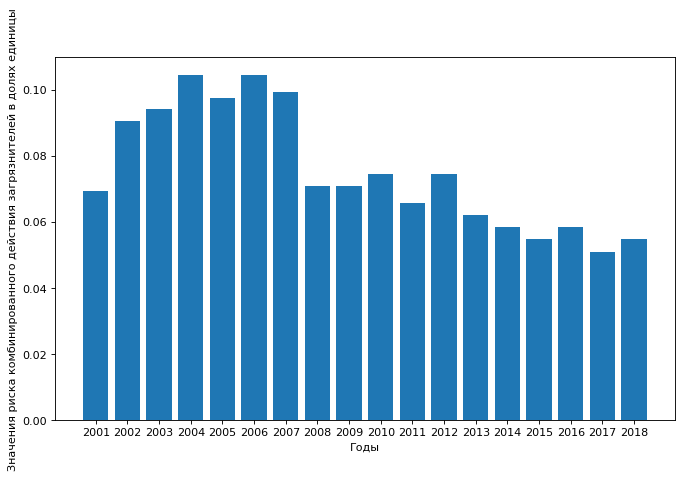

In [13]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax.bar(df['Год'], df["Risk_Summ"])
ax.set_xticks(range(df['Год'].min(),df['Год'].max()+1))
ax.set_ylabel("Значения риска комбинированного действия загрязнителей в долях единицы")
ax.set_xlabel('Годы')
plt.show()